<a href="https://colab.research.google.com/github/soyoonjeong/DeepLearning-study/blob/main/%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence]=1
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  result = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    result[i,labels]=1
  return result

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation="softmax"))

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
          epochs = 20,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 2.6411 - accuracy: 0.4875 - val_loss: 1.7333 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 35ms/step - loss: 1.4178 - accuracy: 0.7086 - val_loss: 1.3023 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.0406 - accuracy: 0.7754 - val_loss: 1.1191 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8124 - accuracy: 0.8275 - val_loss: 1.0437 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.6498 - accuracy: 0.8652 - val_loss: 0.9686 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5139 - accuracy: 0.8956 - val_loss: 0.9336 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 0.4168 - accuracy: 0.9148 - val_loss: 0.9092 - val_accuracy: 0.8110
Epoch 8/20
16

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

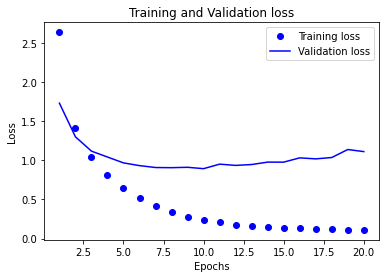

In [ ]:
import matplotlib.pyplot as plt

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss,'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

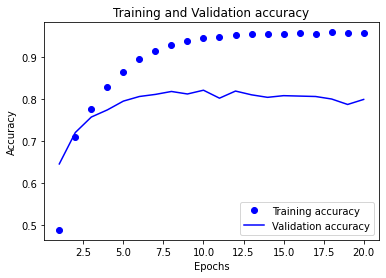

In [ ]:
import matplotlib.pyplot as plt

loss = history_dict["accuracy"]
val_loss = history_dict["val_accuracy"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = "Training accuracy")
plt.plot(epochs, val_loss,'b', label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics =["accuracy"])

model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 2.5697 - accuracy: 0.5496 - val_loss: 1.6980 - val_accuracy: 0.6390
Epoch 2/9
16/16 [==============================] - 1s 36ms/step - loss: 1.3776 - accuracy: 0.7125 - val_loss: 1.2845 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 1s 35ms/step - loss: 1.0164 - accuracy: 0.7853 - val_loss: 1.1207 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 1s 36ms/step - loss: 0.7953 - accuracy: 0.8330 - val_loss: 1.0031 - val_accuracy: 0.7960
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 0.6336 - accuracy: 0.8652 - val_loss: 0.9507 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 37ms/step - loss: 0.5040 - accuracy: 0.8920 - val_loss: 0.9557 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 36ms/step - loss: 0.4070 - accuracy: 0.9156 - val_loss: 0.9035 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

[0.9891872406005859, 0.7894033789634705]